In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math


# Draw some points on a 2D plane to which a fifth-order polynomial can fit. Show one candidate fifth order polynomial that will fit these points. Now show an alternate fifth order polynomial that will fit the same points. Comment on the relative coefficients of the two polynomials (how can you do this from a sketch?).

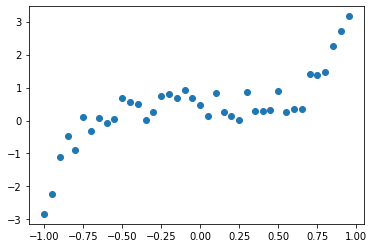

In [ ]:
x = np.arange(-1,1,0.05)   
t = 3*np.power(x,5) + np.random.rand(40)
plt.scatter(x, t)
plt.show()

Step   0 | Loss 3.26 [[-0.23837991]
 [-1.31252033]
 [ 1.00880712]
 [ 0.89188238]
 [-0.067555  ]
 [ 0.7130488 ]]
Step 100 | Loss 0.27 [[-0.00317531]
 [ 0.01556805]
 [ 0.00063414]
 [ 0.00260362]
 [-0.00203872]
 [ 0.00039797]]
Step 200 | Loss 0.24 [[-2.63549335e-03]
 [ 6.58979682e-02]
 [ 8.49811730e-05]
 [ 1.05313503e-03]
 [-3.05500257e-03]
 [ 3.04545852e-05]]
Step 300 | Loss 0.19 [[-1.98255896e-03]
 [ 6.50747040e-03]
 [-1.62166051e-04]
 [ 7.51453681e-05]
 [-6.22356792e-03]
 [-1.39096890e-04]]
Step 400 | Loss 0.17 [[-0.00090254]
 [-0.02940601]
 [ 0.00085977]
 [-0.00553859]
 [-0.00831312]
 [ 0.00072629]]
Step 500 | Loss 0.17 [[-0.00058796]
 [-0.01961408]
 [ 0.00110453]
 [-0.00920145]
 [-0.00802038]
 [ 0.00096581]]
Step 600 | Loss 0.16 [[-0.0004784 ]
 [-0.0163246 ]
 [ 0.00133846]
 [-0.01405583]
 [-0.01279609]
 [ 0.00121507]]
Step 700 | Loss 0.15 [[-0.00050383]
 [-0.01756454]
 [ 0.00157287]
 [-0.01601991]
 [-0.01269396]
 [ 0.00137555]]
Step 800 | Loss 0.14 [[-0.00043602]
 [-0.01555399]
 [ 0.

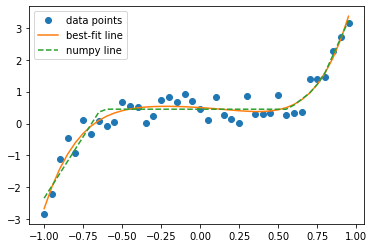

In [ ]:
poly_w = np.polyfit(x,t,5)
p5 = np.poly1d(poly_w)
poly_y = p5(x)
def dlrelu(x):
  dx = np.ones_like(x)
  dx[x < 0] = 0.1
  return dx
def MLPregression(x,t,depth,rate,steps):
  parameters={}
  parameters["w1"]=np.random.randn(depth,len(x[0]))
  parameters["b1"]=np.zeros(depth)
  parameters["w"]=np.random.randn(depth)
  parameters["b"]=0
  for i in range(steps):
    z1=np.dot(x, parameters['w1'].T)  + parameters['b1']
    h=np.where(z1 > 0, z1, z1 * 0.1) 
    z=np.dot(h, parameters['w'].T) + parameters['b']
    y=z
    loss=(1/len(x)) * np.sum(0.5*(y-t)*(y-t))
    L_bar = 1
    z_bar = (1/len(x)) * (y - t)
    w_bar = np.dot(h.T, z_bar)
    b_bar = np.dot(z_bar, np.ones(len(x)))
    h_bar = np.outer(z_bar, parameters['w'].T)
    z1_bar = dlrelu(z1)*h_bar
    w1_bar = np.dot(z1_bar.T, x)
    b1_bar = np.dot(z1_bar.T, np.ones(len(x)))
    parameters["w1"]-=rate*w1_bar
    parameters["b1"]-=rate*b1_bar
    parameters["w"]-=rate*w_bar
    parameters["b"]-=rate*b_bar
    if i % 100 == 0:
      print("Step {:3d} | Loss {:3.2f}".format(i, loss),w1_bar)
  return parameters,loss
def forward3(x, params):    
    z1 = np.dot(x, params['w1'].T)  + params['b1']
    h = np.where(z1 > 0, z1, z1 * 0.1)
    z = np.dot(h, params['w'].T) + params['b']
    y = z
    
    return y
params,lossvalue=MLPregression(x.reshape(40,1),poly_y,6,0.0517,10000)
poly_yregression=forward3(x.reshape(40,1),params)
plt.plot(x,t,"o",x,poly_y,"-",x,poly_yregression,"--")
plt.legend(loc='upper left', labels=['data points', 'best-fit line', 'numpy line'])

# Contrast this exercise with the motivating example from lecture I on polynomial regression.

The example of polynomial regression in lecture 1 was based on a engineering designed feature function to expend the dimensions of input for polynomial fitting. However, this feature function requires the knowledge of designer for the nature of the problem and may be specific to that kind of problems.

# Why are we only proposing augmentation of the training dataset?

The augmentation of dataset is applicable to introduce variance to the dataset. In the example of tank recognition, there could be bias in the dataset to incorrectly correlate tank with bluesky as a whole recognition criteria which may fail the validation when there is only tank and no bluesky. However, if we also modify the validation and testing dataset, we would introduce bias to the phenomena because we are artifically extend the phenomena.

# Does a bottleneck layer require nonlinearities? Justify your answer,

Yes. Without nonlinearities, there would be no change of #DOFs, and the bottleneck layer would become a meaningless extra work. 

# Suppose we knew that model M1 with N1 DOFs fit the first mode of operation, and model M2 with N2 DOFs fit the second mode of operation. Describe how these three solutions {M,N}, {M1,N1} and {M2,N2} relate to each other in terms of suitability to solving the problem, lower number of DOFs, etc. Consider a practical case: suppose our dataset expresses a relationship that has (for some inputs) a fourth order polynomial nonlinear relationship, and (for other inputs) a linear relationship. How would {M,N}, {M1,N1}, {M2,N2} look for this case?

A combination of {M1,N1} and {M2,N2} would be a more effective solution than {M,N}. Referring to the example. M1 would be a fourth order model with 5 DOFs (to weight the four powers, plus a bias) and M2 would be a first order linear model with 2 DOFs (one weight, plus a bias). However, the {M,N} model may contains more than 5 parameters to fit the dataset. The problem of overfitting may occur since neither the fourth order model nor the first order linear model need more than 5 DOFs.

# 1.   Draw the network structure from input to output classification
# 2.   Annotate the sizes of the mathematical objects within; inputs, outputs, filters, etc.
#3.   How is dropout applied?
#4.   What is the performance with Dropout enabled?
#5.   Now disable it. What is the performance?
#6.   Alter the Dropout settings; how is performance affected?
#7.   Comment on your results. Consider how the structure/operations change when dropout is varied.





dropout steps are applied by randomly setting input units to 0 with a frequency of rate and scaling up other input units by 1/(1 - rate) such that the sum over all inputs is unchanged.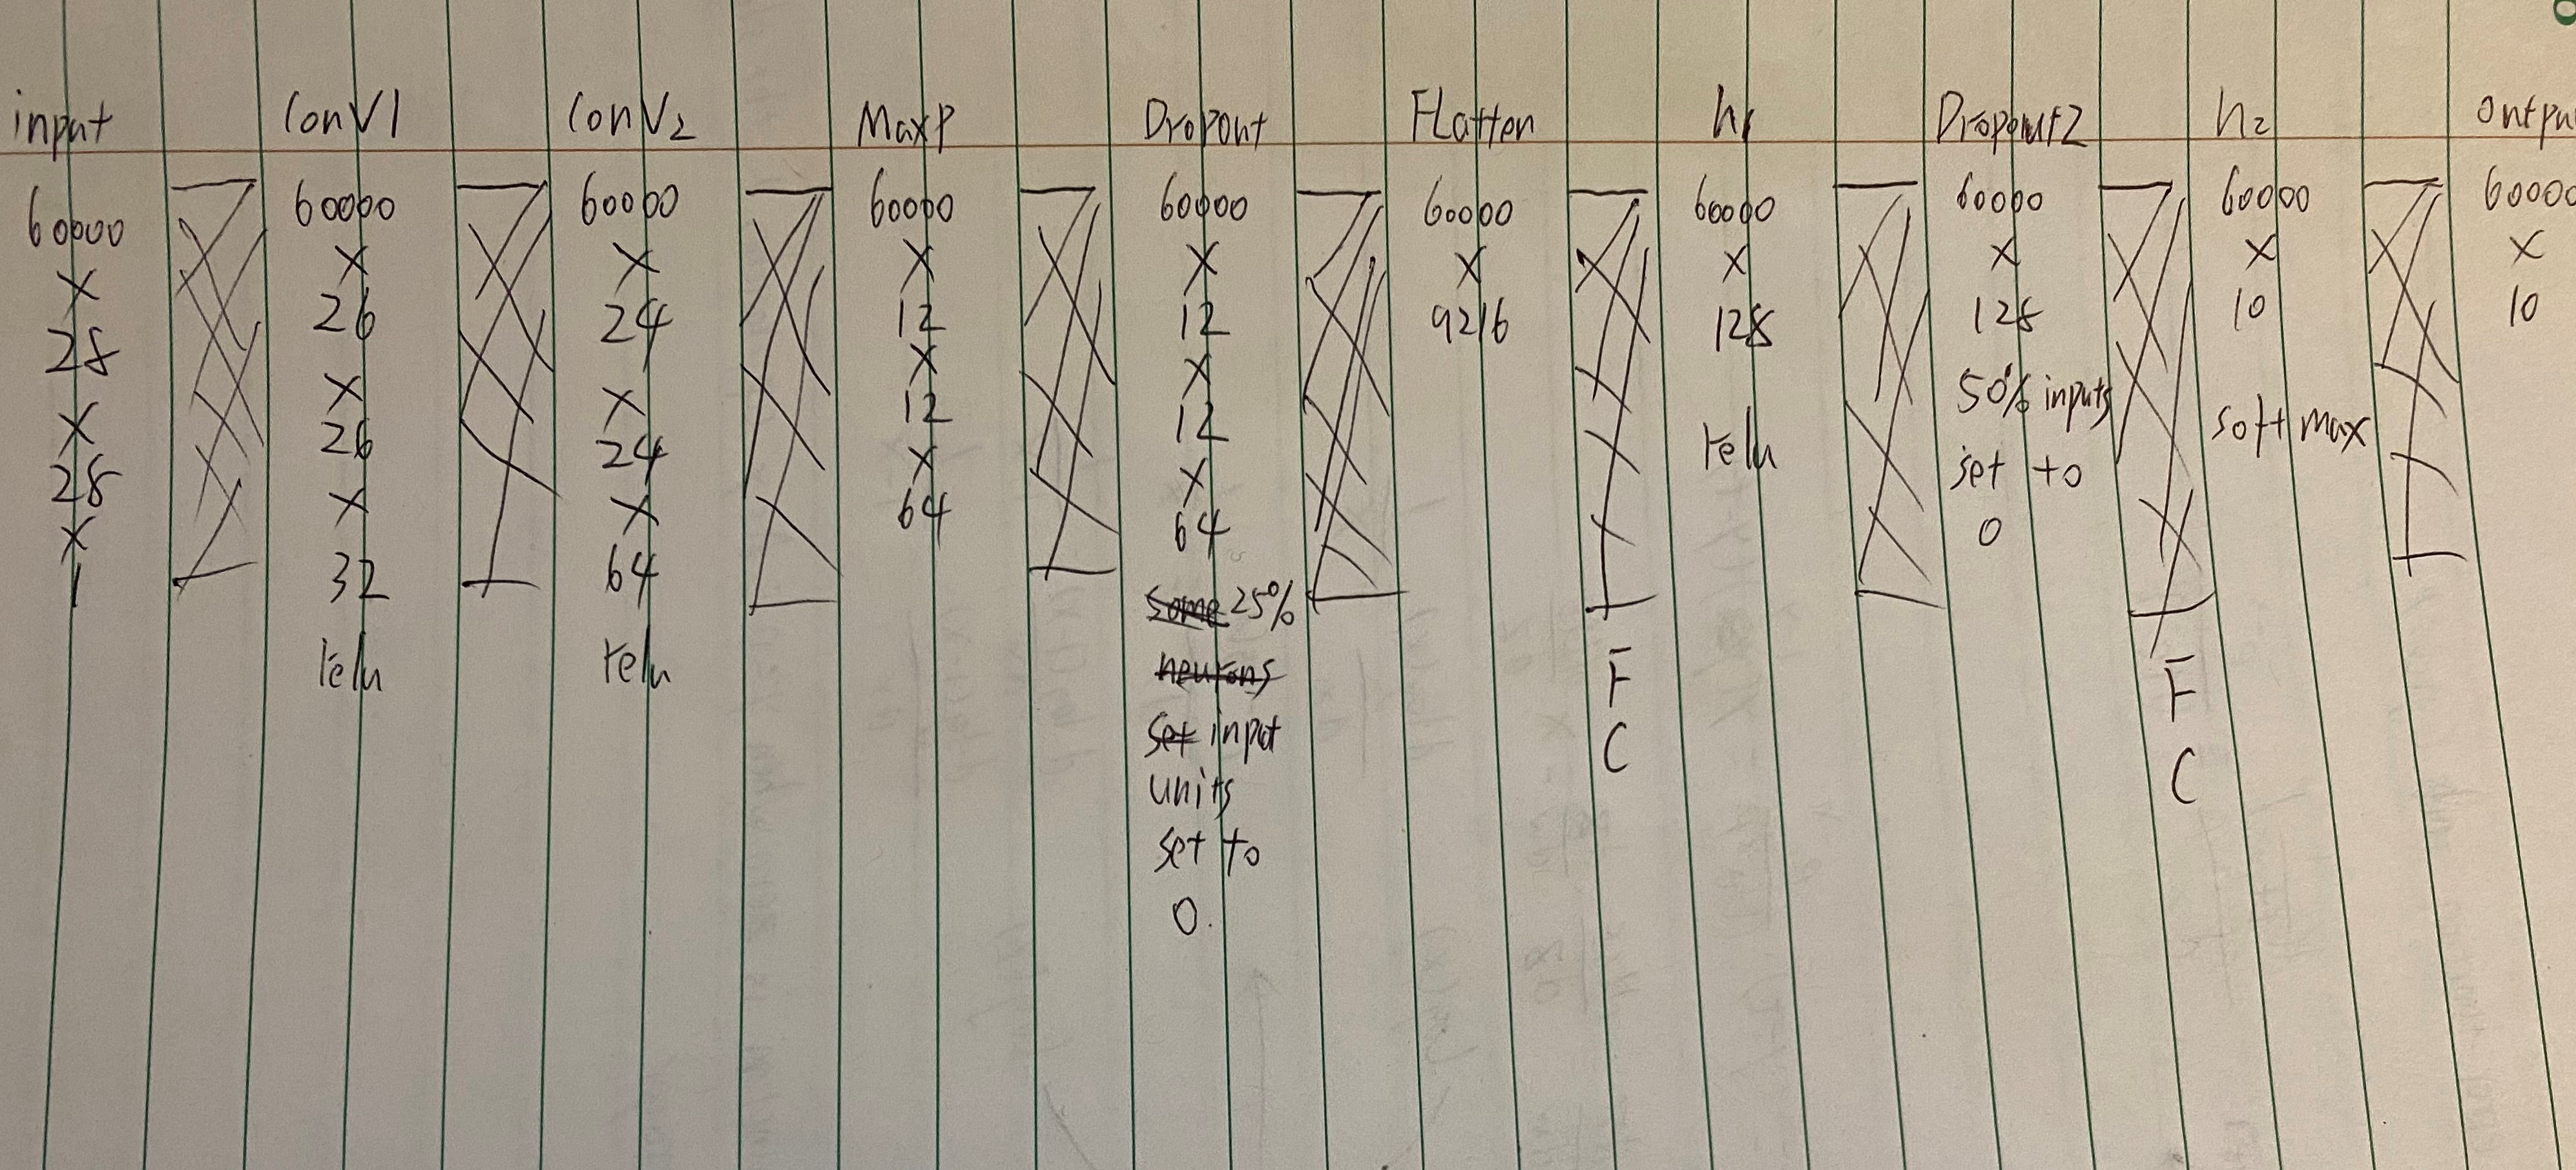

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import pandas as pd
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
print(train_images.shape)
# reshape images to specify that it's a single channel
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [ ]:
#model with dropout
model = keras.Sequential()
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# 64 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
# flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
# one more dropout
model.add(Dropout(0.5))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))
model.compile(optimizer="Adam", 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 130s 69ms/step - loss: 1.7034 - accuracy: 0.8398
Epoch 2/5
1875/1875 [==============================] - 130s 69ms/step - loss: 0.1555 - accuracy: 0.9553
Epoch 3/5
1875/1875 [==============================] - 130s 69ms/step - loss: 0.1077 - accuracy: 0.9699
Epoch 4/5
1875/1875 [==============================] - 129s 69ms/step - loss: 0.0904 - accuracy: 0.9734
Epoch 5/5
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0783 - accuracy: 0.9767


In [ ]:
print(test_images.shape)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

(10000, 28, 28, 1)
313/313 [==============================] - 6s 18ms/step - loss: 0.0459 - accuracy: 0.9870
Test accuracy: 0.9869999885559082


In [ ]:
#model without drop out
model2 = keras.Sequential()
# 32 convolution filters used each of size 3x3
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# 64 convolution filters used each of size 3x3
model2.add(Conv2D(64, (3, 3), activation='relu'))
# choose the best features via pooling
model2.add(MaxPooling2D(pool_size=(2, 2)))
# randomly turn neurons on and off to improve convergence
model2.add(Flatten())
# fully connected to get all relevant data
model2.add(Dense(128, activation='relu'))
# one more dropout
model2.add(Dense(10, activation='softmax'))
model2.compile(optimizer="Adam", 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 136s 72ms/step - loss: 1.9818 - accuracy: 0.9097
Epoch 2/5
1875/1875 [==============================] - 135s 72ms/step - loss: 0.0507 - accuracy: 0.9837
Epoch 3/5
1875/1875 [==============================] - 134s 72ms/step - loss: 0.0334 - accuracy: 0.9895
Epoch 4/5
1875/1875 [==============================] - 138s 73ms/step - loss: 0.0259 - accuracy: 0.9922
Epoch 5/5
1875/1875 [==============================] - 138s 74ms/step - loss: 0.0208 - accuracy: 0.9930


In [ ]:
print(test_images.shape)
test_loss, test_acc = model2.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

(10000, 28, 28, 1)
313/313 [==============================] - 6s 17ms/step - loss: 0.0748 - accuracy: 0.9823
Test accuracy: 0.9822999835014343


after dropout deactivation, we obtained a higher accuracy on training but a lower test accuracy due to the overfitting. 

# Exercise [ Ensemble Approaches ] 

Horizontal Voting

In [ ]:
n_epochs = 5
n_save = 2
for i in range(n_epochs):
  model.fit(train_images, train_labels, epochs=1)
  if i >= n_save:
    model.save('/model_' + str(i) + '.h5')

1875/1875 [==============================] - 144s 77ms/step - loss: 0.0542 - accuracy: 0.9842


In [ ]:
from tensorflow.keras.models import load_model
def load_models(start,end):
  all_models=list()
  for i in range(start,end):
    filename = '/model_' + str(i) + '.h5'
    model = load_model(filename)
    all_models.append(model)
    print('>loaded %s' % filename)
  return all_models
models=list(reversed(load_models(2,5)))

>loaded /model_2.h5
>loaded /model_3.h5
>loaded /model_4.h5


In [ ]:
import sklearn
from sklearn.metrics import accuracy_score
def evaluate_n_models(models,n,test_images,test_labels):
  subset = models[:n]
  prediction = np.array([model.predict(test_images) for model in subset])
  result = np.argmax(np.sum(prediction, axis=0),axis=1)
  return accuracy_score(test_labels,result)

In [ ]:
single_predictions=list()
ensemble_predictions=list()
for i in range(1,len(models)+1):
  ensemble_prediction=evaluate_n_models(models,i,test_images,test_labels)
  _,single_prediction=models[i-1].evaluate(test_images, test_labels)
  print('> %d: single=%.3f, ensemble=%.3f' % (i,single_prediction,ensemble_prediction))

313/313 [==============================] - 5s 16ms/step - loss: 0.0472 - accuracy: 0.9873
> 1: single=0.987, ensemble=0.987
313/313 [==============================] - 5s 16ms/step - loss: 0.0398 - accuracy: 0.9910
> 2: single=0.991, ensemble=0.991
313/313 [==============================] - 5s 16ms/step - loss: 0.0427 - accuracy: 0.9880
> 3: single=0.988, ensemble=0.992


Weighted Average Ensemble and Stacking Ensemble

In [ ]:
n_models=5
for i in range(n_models):
#model with dropout
  model = keras.Sequential()
# 32 convolution filters used each of size 3x3
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# 64 convolution filters used each of size 3x3
  model.add(Conv2D(64, (3, 3), activation='relu'))
# choose the best features via pooling
  model.add(MaxPooling2D(pool_size=(2, 2)))
# randomly turn neurons on and off to improve convergence
  model.add(Dropout(0.25))
# flatten since too many dimensions, we only want a classification output
  model.add(Flatten())
# fully connected to get all relevant data
  model.add(Dense(128, activation='relu'))
# one more dropout
  model.add(Dropout(0.5))
# output a softmax to squash the matrix into output probabilities
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer="Adam", 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  model.fit(train_images, train_labels, epochs=5)
  filename = '/model_stack_' + str(i + 1) + '.h5'
  model.save(filename)
  print('>Saved %s' % filename)

Epoch 1/5
1875/1875 [==============================] - 138s 74ms/step - loss: 1.6519 - accuracy: 0.8190
Epoch 2/5
1875/1875 [==============================] - 138s 74ms/step - loss: 0.1480 - accuracy: 0.9568
Epoch 3/5
1875/1875 [==============================] - 138s 73ms/step - loss: 0.1145 - accuracy: 0.9669
Epoch 4/5
1875/1875 [==============================] - 138s 74ms/step - loss: 0.0943 - accuracy: 0.9714
Epoch 5/5
1875/1875 [==============================] - 138s 74ms/step - loss: 0.0829 - accuracy: 0.9750
>Saved /model_stack_1.h5
Epoch 1/5
1875/1875 [==============================] - 139s 74ms/step - loss: 1.1360 - accuracy: 0.8364
Epoch 2/5
1875/1875 [==============================] - 139s 74ms/step - loss: 0.1475 - accuracy: 0.9567
Epoch 3/5
1875/1875 [==============================] - 140s 75ms/step - loss: 0.1121 - accuracy: 0.9681
Epoch 4/5
1875/1875 [==============================] - 140s 75ms/step - loss: 0.0942 - accuracy: 0.9727
Epoch 5/5
1875/1875 [==================

In [ ]:
def load_stack_models(start,end):
  all_models=list()
  for i in range(start,end):
    filename = '/model_stack_' + str(i) + '.h5'
    model = load_model(filename)
    all_models.append(model)
    print('>loaded %s' % filename)
  return all_models
models=load_stack_models(1,n_models+1)

>loaded /model_stack_1.h5
>loaded /model_stack_2.h5
>loaded /model_stack_3.h5
>loaded /model_stack_4.h5
>loaded /model_stack_5.h5


In [ ]:
for model in models:
  _,acc=model.evaluate(test_images, test_labels)
  print('Model Accuracy: %.3f' % acc)

313/313 [==============================] - 5s 16ms/step - loss: 0.0400 - accuracy: 0.9884
Model Accuracy: 0.988
313/313 [==============================] - 5s 16ms/step - loss: 0.0352 - accuracy: 0.9894
Model Accuracy: 0.989
313/313 [==============================] - 5s 16ms/step - loss: 0.0390 - accuracy: 0.9884
Model Accuracy: 0.988
313/313 [==============================] - 5s 16ms/step - loss: 0.0471 - accuracy: 0.9852
Model Accuracy: 0.985
313/313 [==============================] - 5s 16ms/step - loss: 0.0431 - accuracy: 0.9869
Model Accuracy: 0.987


In [ ]:
def stack_input(models,train_images):
  stack = None
  for model in models:
    prediction = model.predict(train_images)
    if stack is None:
      stack = prediction
    else:
      stack = np.dstack((stack,prediction))
  stack = stack.reshape((stack.shape[0],stack.shape[1]*stack.shape[2]))
  return stack

In [ ]:
def fit_weight(models,train_images,train_labels):
  input_stacked = stack_input(models,train_images)
  model_weighted = keras.Sequential()  
  model_weighted.add(Dense(10, activation='softmax',input_shape=(50,)))
  model_weighted.compile(optimizer="Adam", 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  model_weighted.fit(input_stacked,train_labels,epochs=5)
  return model_weighted

In [ ]:
model_weighted = fit_weight(models,train_images,train_labels)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7870 - accuracy: 0.8693
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0292 - accuracy: 0.9968
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0155 - accuracy: 0.9972
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0141 - accuracy: 0.9970
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0131 - accuracy: 0.9969


In [ ]:
_,acc = model_weighted.evaluate(stack_input(models,test_images), test_labels)
print('Weight Test Accuracy: %.3f' % acc)

313/313 [==============================] - 0s 850us/step - loss: 0.0378 - accuracy: 0.9911
Weight Test Accuracy: 0.991


In [ ]:
from sklearn.linear_model import LogisticRegression
def fit_stack_L(models,train_images,train_labels):
  input_stacked = stack_input(models,train_images)
  model_stacked = LogisticRegression()
  model_stacked.fit(input_stacked,train_labels)
  return model_stacked

In [ ]:
model_stacked = fit_stack_L(models,train_images,train_labels)

In [ ]:
print(model_stacked.predict(stack_input(models,test_images)).shape)
acc = accuracy_score(test_labels,model_stacked.predict(stack_input(models,test_images)))
print('Stacked Test Accuracy: %.3f' % acc)

(10000,)
Stacked Test Accuracy: 0.991


In [ ]:
def fit_stack(models,train_images,train_labels):
  input_stacked = stack_input(models,train_images)
  model_stacked = keras.Sequential() 
  model_stacked.add(Dense(32, activation='relu',input_shape=(50,)))
  model_stacked.add(Dense(10, activation='softmax',))
  model_stacked.compile(optimizer="Adam", 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  model_stacked.fit(input_stacked,train_labels,epochs=5)
  return model_stacked

In [ ]:
model_stacked = fit_stack(models,train_images,train_labels)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4462 - accuracy: 0.9302
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0137 - accuracy: 0.9971
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0130 - accuracy: 0.9969
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0119 - accuracy: 0.9972
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0105 - accuracy: 0.9974


In [ ]:
_,acc = model_stacked.evaluate(stack_input(models,test_images), test_labels)
print('Weight Test Accuracy: %.3f' % acc)

313/313 [==============================] - 0s 899us/step - loss: 0.0450 - accuracy: 0.9907
Weight Test Accuracy: 0.991
